<a href="https://colab.research.google.com/github/RoseBorges44/data_science/blob/main/Titanic1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic: Machine Learning from Disaster

---

O **Titanic Challenge** é um dos mais populares e é promovido pela kaggle.com. A popularidade deste concurso levou-o a ser considerado **Hello, World!** no incrível universo da Ciência de Dados.

A maioria de vocês provavelmente conhece a história do naufrágio mais moderno do mundo na época. Apesar da tecnologia disponível, após atingir um iceberg em 15 de abril de 1912, **seu naufrágio matou 1.502 de seus *2.224* passageiros.**

![Titanic](https://images.trustinnews.pt/uploads/sites/5/2019/10/investigador-que-encontrou-titanic-explica-como-tudo-aconteceu-durante-missao-secreta-na-guerra-fria-2-638x414.png)

Como um fator importante, logo se descobriu que não havia botes salva-vidas suficientes para todos os tripulantes e passageiros.

Obviamente, aqueles que sobreviveram à tragédia tiveram muita sorte, mas alguns grupos de passageiros não são "sortudos" do que outros? Crianças e mulheres realmente têm mais chances de sobrevivência? É menos provável que Jack escape de um destino trágico do que Rose, simplesmente porque ele voa em terceiro lugar?

Com dados reais disponíveis,realizarei análises exploratórias, testarei suas hipóteses e até mesmo construirei um modelo preditivo para descobrir as minhas chances de sobrevivência se estiver viajando com meu marido e filhos ?!

## Sobre este notebook

> **Resumidamente, o objetivo deste desafio é montar um relatório contendo (no mínimo) as 3 primeiras fases do CRISP-DM (business understanding, data understanding e data preparation), depois utilizar os dados disponíveis para medir a chance de sobrevivência dos passageiros do Titanic.**

## Checklist

1. Definição do Problema
2. Obtenção dos Dados
3. Exploração dos Dados
4. Preparação dos Dados
5. Construção do Modelo
6. Avaliação


A metodologia **CRISP-DM (Cross-Industry Standard Process for Data Mining)** é uma abordagem amplamente utilizada para conduzir projetos de mineração de dados, mas também pode ser aplicada a projetos de análise de dados, como o desafio de análise de dados do Titanic.


Abaixo a descrição das etapas do CRISP-DM e como aplicá-las a esse desafio:

1. Entendimento do Negócio (Business Understanding):
 - Defino claramente o problema.
 - Identifico os objetivos do projeto.
2. Entendimento dos Dados (Data Understanding):
 - Coleta de dados relevantes do Titanic.
 - Exploração dos dados para entender sua estrutura e distribuição.
 3. Preparação dos Dados (Data Preparation):
 - Lido com valores ausentes, outliers e dados inconsistentes.
 - Realizo transformações, como codificação de variáveis categóricas.
 - Divido os dados em conjuntos de treinamento e teste.
4. Modelagem (Modeling):
 - Escolho algoritmos de machine learning adequados para o problema.
 - Treino modelos usando o conjunto de treinamento.
 - Avalio o desempenho dos modelos com métricas relevantes usando o conjunto de teste.
 5. Avaliação (Evaluation):
 - Comparo o desempenho dos modelos para selecionar o melhor.
 - Faço ajustes no modelo, se necessário, com base na avaliação.
6. Implantação (Deployment):
 - Implemento o modelo em um ambiente de produção, se aplicável.
7. Manutenção (Maintenance):
 - Monitoro e mantenho o modelo em produção para garantir seu desempenho contínuo.


## 1. Definição do Problema

A construção do Titanic levou cerca de 2 anos e custou 7,5 milhões de dólares (valores da época). Com 269 metros de comprimento, 28 metros de largura e 53 metros de altura, operava com uma tripulação de 892 pessoas e poderia levar até 2435 passageiros (espalhados pelas três classes disponíveis).

Pensado para ser o mais seguro e luxuoso navio da época, foi lançado ao mar em 1911, ganhando fama de ser "inafundável".

A descrição completa da competição, assim como o conjunto de dados, está disponível na página do Kaggle [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic).

O naufrágio do Titanic teve como fatores contribuintes causas naturais (como o clima) e causas humanas (negligência e excesso de confiança). Independente das causas, o fato é que seu naufrágio matou 1502 pessoas de um total de 2224 passageiros.

Embora aqueles que escaparam com vida tiveram sua boa dose de sorte, alguns grupos de pessoas eram mais propensos a escaparem da morte do que outros. Por exemplo, mulheres, crianças e passageiros da 1ª Classe. Assim, nota-se que existe algum padrão que pode ser extraído dos dados brutos.

### Objetivo

Utilizando a metodologia CRISP-DM, faremos uma **análise sobre quais variáveis tiveram maior influência na probabilidade de sobrevivência** (ou seja, que tipo de pessoa teve mais chance de escapar com vida).

Após analisar os dados, construiremos **construir um modelo que dê a previsão de sobrevivência** para um passageiro qualquer que seja fornecido como *input*.


### Métrica de Desempenho

O *score* é calculado em relação ao número de previsões corretas que seu modelo fez. Ou seja, é considerada apenas a **acurácia** do modelo.


## 2. Obtenção dos Dados

[Os dados disponibilizados pelo Kaggle](https://www.kaggle.com/c/titanic/data) foram divididos em dois grupos:

* Dataset de treino (```train.csv```)
    * Deve ser usado para construir o modelo de Machine Learning. Neste conjunto de dados, é informado se o passageiro sobreviveu ou não.
    * Composto por diversas *features* como gênero do passageiro e classe do embarque.
* Dataset de Teste (```test.csv```)
    * Deve ser usado como dados que nunca forma vistos pelo modelo. Neste conjunto de dados, não é informado se o passageiro sobreviveu ou não.
    
Também é disponibilizado um modelo (gabarito) de como as previsões devem ser enviadas para a plataforma do Kaggle (```gender_submission```).

Para conseguir baixar os arquivos, é precisar criar um login no Kaggle antes. Para facilitar, os arquivos estão junto com este notebook (pasta ```./data/...```

In [ ]:
# listar os arquivos no diretório
!ls

gender_submission.csv  imagem_2023-10-30_093328644.png	sample_data  test.csv  train.csv


In [ ]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# permitir visualizar todas as colunas
pd.options.display.max_columns = None

# renderizar os gráficos diretamento no notebook
# %matplotlib inline

In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

**Q1.** Quantas variáveis (colunas) e quantas entradas (linhas) possui o arquivo?

In [ ]:
# verificando as dimensões do DataFrame
print("Variáveis:\t{}\nEntradas:\t{}".format(train.shape[1], train.shape[0]))

Variáveis:	12
Entradas:	891


## 3. Exploração dos Dados

Em uma análise inicial, serão estudadas cada variável. É importante verificar seu nome, tipo, porcentagem de valores faltantes, presença de outliers e tipo de distribuição.

Como se trata de um Aprendizado Supervisionado (*Supervised Learning*), a variável ```Survived``` é definida como sendo a nossa variável alvo (*target*).

### Dicionário de Dados

* **PassengerId:** Número de identificação do passageiro
* **Survived:** Informa se o passageiro sobreviveu ao desastre
    * 0 = Não
    * 1 = Sim
* **Pclass:** Classe do bilhete
    * 1 = 1ª Classe
    * 2 = 2ª Classe
    * 3 = 3ª Classe
* **Name:** Nome do passageiro
* **Sex:** Sexo do passageiro
* **Age:** Idade do passageiro
* **SibSp:** Quantidade de cônjuges e irmãos a bordo
* **Parch:** Quantidade de pais e filhos a bordo
* **Ticket:** Número da passagem
* **Fare:** Preço da Passagem
* **Cabin:** Número da cabine do passageiro
* **Embarked:** Porto no qual o passageiro embarcou
    * C = Cherbourg
    * Q = Queenstown
    * S = Southampton

**Q1. Quais os tipos de cada variável?**

* Variáveis Numéricas
    * Discretas
        * Pclass
        * SibSp
        * Parch
    * Contínuas
        * Age
        * Fare
    * Alvo
        * Survived
    * Chave Primária
        * PassengerId
* Variáveis Categóricas
    * Name
    * Sex
    * Ticket
    * Cabin
    * Embarked

In [ ]:
# identificar o tipo de cada variável
display(train.dtypes)

# ver as 5 primeiras entradas do conjunto de treino
display(train.head())

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Q2. Qual a porcentagem de valores faltantes?**

A informação sobre a **Cabin** é a que possui o maior número de informações faltantes, com mais de 77%. Após, a coluna **Age** não possui valor em quase 20% dos passageiros. Por fim, a coluna informando o Porto de embarque (**Embarked**) possui apenas 2% de informações faltantes.

In [ ]:
# ver a porcentagem valores faltantes
(train.isnull().sum() / train.shape[0]).sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
dtype: float64

**Q3. Como é a distribuição estatística dos dados?**

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


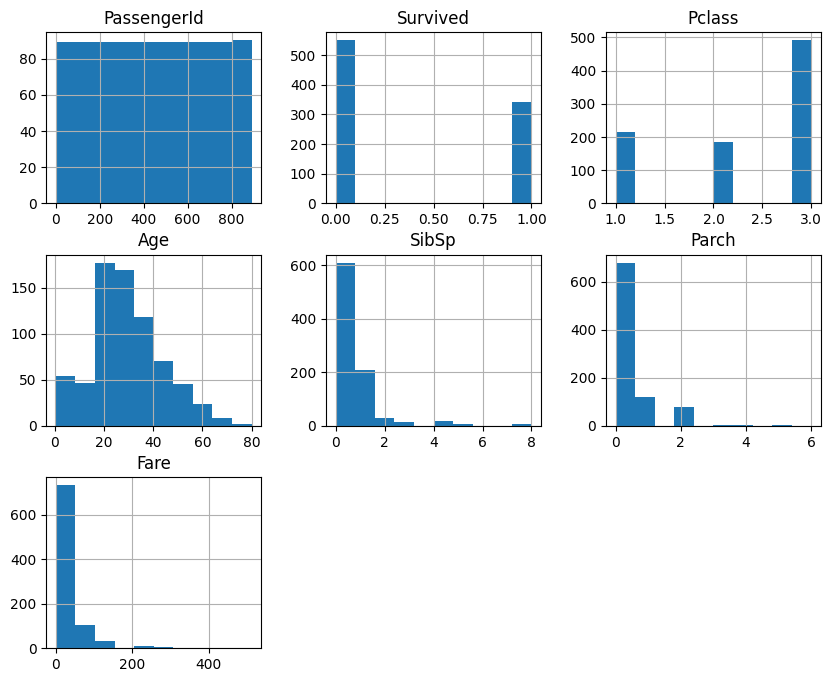

In [ ]:
# ver histograma das variáveis numéricas
train.hist(figsize=(10,8));

**Q4. Quais grupos de pessoas tinham mais chances de sobrevivência??**

In [ ]:
# Analisar a probabilidade de sobrevivência pelo Sexo
train[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


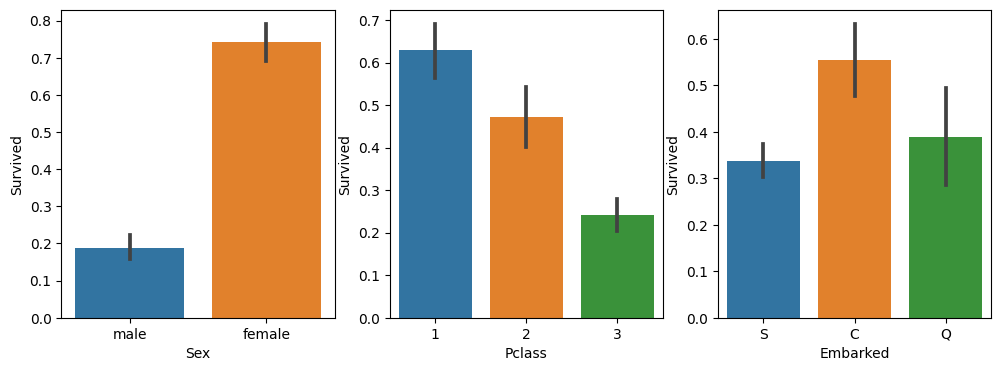

In [ ]:
# Plotar os gráficos para Survived vs. Sex, Pclass e Embarked
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(12,4))

sns.barplot(x='Sex', y='Survived', data=train, ax=axis1)
sns.barplot(x='Pclass', y='Survived', data=train, ax=axis2)
sns.barplot(x='Embarked', y='Survived', data=train, ax=axis3);

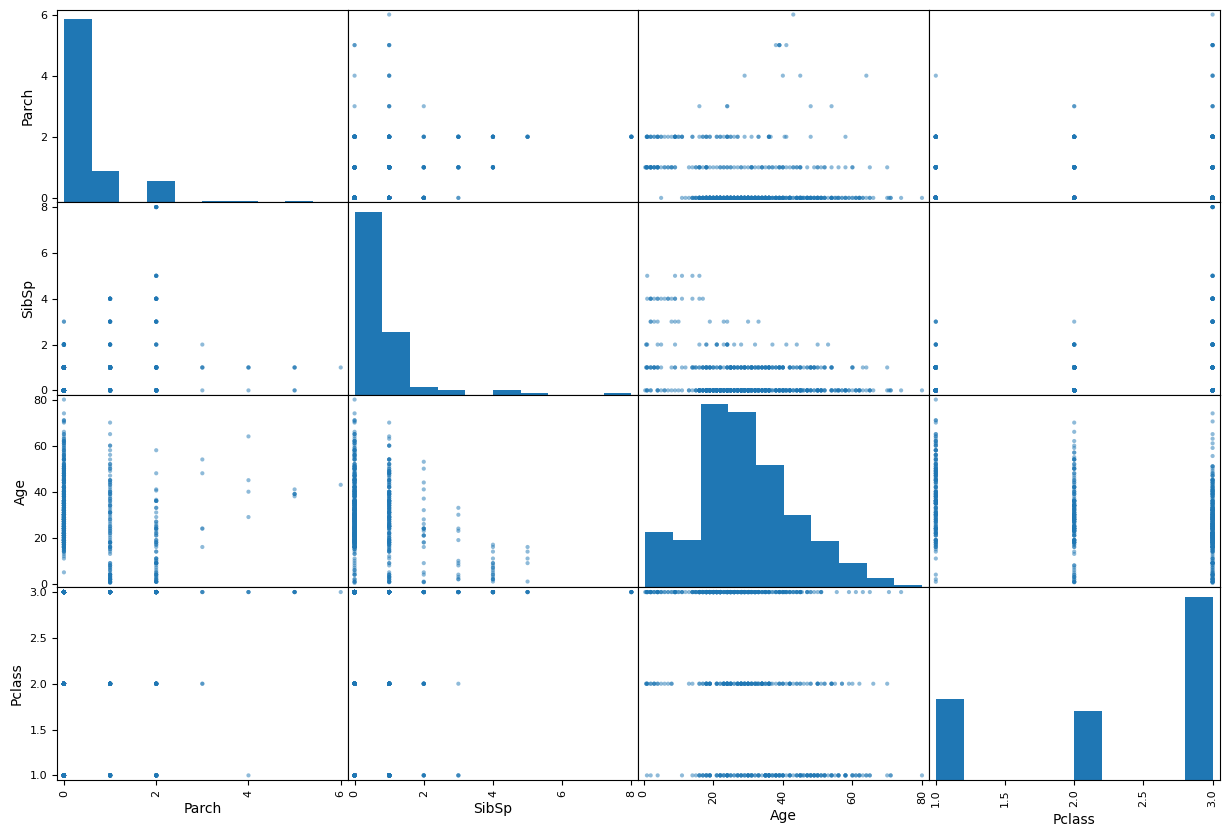

In [ ]:
# plotar uma scatter matrix
columns=['Parch', 'SibSp', 'Age', 'Pclass']
pd.plotting.scatter_matrix(train[columns], figsize=(15, 10));

<ipython-input-16-51dab433ab04>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), cmap='coolwarm', fmt='.2f', linewidths=0.1,


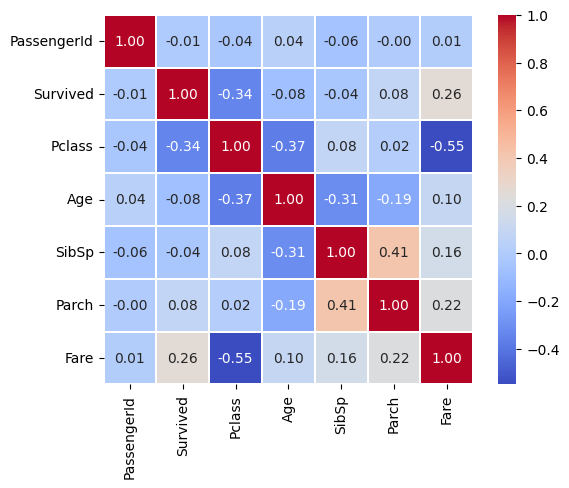

In [ ]:
# plotar o heatmap para as variáveis numéricas
sns.heatmap(train.corr(), cmap='coolwarm', fmt='.2f', linewidths=0.1,
            vmax=1.0, square=True, linecolor='white', annot=True);

Pouca gente sabe que o método ```df.describe()``` pode ser usado também para ver algo sobre a estatística descritiva em colunas que não são números. Para isso, é só passar o argumento ```include=['O']```.

**ATENÇÃO, é a letra 'O', e não o número 0!**

In [ ]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Olhando esses dados a gente observa que:
* Os valores para ```Name``` são únicos, um para cada pessoa;
* Não há *missing values* para ```Name``` e ```Sex```;
* Existem apenas os sexos Masculino e Feminino, sendo que o com maior frequência é o Masculino (577/891 = 65%);
* O Porto no qual embarcaram mais passageiros é o de S = Southampton.

## 4 Preparação dos Dados

Até agora, tudo o que fizemos foi inserir dados em estruturas DataFrame, construir hipóteses, executar análises exploratórias de dados e visualizar gráficos e correlações entre variáveis ​​que consideramos relevantes.

Um projeto não é amarrado e rigoroso, onde a gente segue um passo-a-passo linear, mas sim um processo iterativo, onde a gente vai e volta sempre que for necessário.

Quando seguramos o caderno de alguém, sempre temos a impressão de que ele está bem organizado e "direto ao ponto*". No entanto, antes que eu possa trazer uma versão fofa, tenho que ir e voltar desde o início inúmeras vezes!

Lembre-se disso:
A versão final é a versão que foi reescrita muitas vezes.

### Juntando os *datasets* de treino e teste

Um truque para preparar dados para um modelo de aprendizado de máquina é mesclar os conjuntos de dados de treinamento e teste em um e, em seguida, separá-los novamente no final.

Assim fica muito mais fácil fazer todos os passos para um único DataFrame e separar novamente entre treinamento e teste.

In [ ]:
# salvar os índices dos datasets para recuperação posterior
train_idx = train.shape[0]
test_idx = test.shape[0]

# salvar PassengerId para submissao ao Kaggle
passengerId = test['PassengerId']

# extrair coluna 'Survived' e excluir ela do dataset treino
target = train.Survived.copy()
train.drop(['Survived'], axis=1, inplace=True)

# concatenar treino e teste em um único DataFrame
df_merged = pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

print("df_merged.shape: ({} x {})".format(df_merged.shape[0], df_merged.shape[1]))

df_merged.shape: (1309 x 11)


### Selecionar as *features*

Como qualquer conjunto de dados do mundo real, você vai se deparar sempre com dados que não servem para nada e outros que não tem peso ou significância nenhuma no seu modelo.

Muitas vezes nosso julgamento pode ser equivocado, mas infelizmente é papel seu, como cientista de dados, escolher quais *features* serão usadas para o modelo de *Machine Learning*.

No nosso caso, vamos desconsiderar as variáveis ```['PassengerId', 'Name', 'Ticket', 'Cabin']```, pois **aparentemente** não parecem relevantes.

In [ ]:
df_merged.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

Assim, ficamos com as seguintes variáveis a serem tratadas e preparadas: ```['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']```.

### Valores faltante

Vamos dar uma olhada nos valores que faltam em cada columna e tratar esses campos vazios.

Normalmente, há duas abordagens mais utilizadas quando a gente encontra *missing values*:
* Preencher esses valores arbitrariamente (média, mediana, valor mais frequente); e
* Excluir a linha inteira.

Cada caso é um caso e novamente você, cientista de dados, é quem vai tomar a decisão sobre qual passo seguir.

Na maioria das vezes não é desejável jogar informação de uma linha inteira só por causa de um campo faltando. Sempre que possível é melhor você preencher o campo, e é isso que vamos fazer.

In [ ]:
# completar ou apagar valores faltantes nos datasets de treino e teste
df_merged.isnull().sum()

Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

Para as variáveis idade e tarifa, vou colocar o valor da mediana, e para a variável do porto de embarque, vou colocar o valor com maior frequência.

In [ ]:
# age
age_median = df_merged['Age'].median()
df_merged['Age'].fillna(age_median, inplace=True)

# fare
fare_median = df_merged['Fare'].median()
df_merged['Fare'].fillna(fare_median, inplace=True)

# embarked
embarked_top = df_merged['Embarked'].value_counts()[0]
df_merged['Embarked'].fillna(embarked_top, inplace=True)

### Preparar as variáveis pro modelo

O modelo matemático exige que trabalhemos com variáveis numéricas, ou seja, temos transformar os dados de entrada que estão em formato categoria para números.

Como você vê abaixo, eu convertir os valores possíveis de ```Sex```para ```{'male': 0, 'female': 1}```. Já em relação à variável ```Embarked```, apliquei o conceito de variáveis dummies.

As variáveis dummies (*dummy variables*) assumem aqui apenas valores 0 e 1, criando uma nova coluna para cada valor possível da variável categórica. Para ficar mais fácil entender, veja como fica o *DataFrame* após todos esses tratamentos:

In [ ]:
# converter 'Sex' em 0 e 1
df_merged['Sex'] = df_merged['Sex'].map({'male': 0, 'female': 1})

# dummie variables para 'Embaked'
embarked_dummies = pd.get_dummies(df_merged['Embarked'], prefix='Embarked')
df_merged = pd.concat([df_merged, embarked_dummies], axis=1)
df_merged.drop('Embarked', axis=1, inplace=True)

display(df_merged.head())

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_914,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,0,1


### Recuperando os datasets de treino e teste

Aqui a gente acabou de preparar o *dataset* para o modelo e vou dividir ```df_merged``` em ```train``` e ```test```, exatamente como era no começo.

Agora você consegue entender a razão da concatenação lá em cima. Teríamos trabalho dobrado e ainda teria o risco de errarmos em alguma etapa.

In [ ]:
# recuperar datasets de treino e teste
train = df_merged.iloc[:train_idx]
test = df_merged.iloc[train_idx:]

## 5 Construção do Modelo e Avaliação

É amplamente reconhecido na área de Data Science que a etapa mais demorada em qualquer projeto é a Análise Exploratória de Dados e o processo de preparação e tratamento dos dados.
Todos os professores destacam a importância dessas fases demoradas para garantir a qualidade e a confiabilidade de qualquer análise de dados.

Todo cuidado que tivemos serviu para entender o problema, testar hipóteses e descartar dados desnecessários/redundantes.

Com poucas linhas de código a gente consegue criar e otimizar modelos de *Machine Learning* básicos. Aqui, vamos construir dois:

* Modelo de Regressão Logística
* Modelo de Árvore de Decisão

In [ ]:
# importar bibliotecas do modelo de Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# criar um modelo de Regressão Logística
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(train, target)

# verificar a acurácia do modelo
acc_logReg = round(lr_model.score(train, target) * 100, 2)
print("Acurácia do modelo de Regressão Logística: {}".format(acc_logReg))

Acurácia do modelo de Regressão Logística: 80.13


Com praticamente duas linhas, construímos um modelo de Regressão Logística com acurácia de 80% em cima do conjunto de dados de treino.

Esse resultado está excelente para um primeiro modelo.Vou aproveitar e fazer a previsão sobre o *dataset* de teste para submetermos ao Kaggle e comparar o desempenho.

In [ ]:
y_pred_lr = lr_model.predict(test)

submission = pd.DataFrame({
    "PassengerId": passengerId,
    "Survived": y_pred_lr
})

# gerar arquivo csv
submission.to_csv('./submission_lr.csv', index=False)

Como você vê na figura abaixo, nosso modelo conseguiu atingir um *score* de 75%.

/content/kaggle titan.png

Não é incomum termos desempenho inferior quando submetemos as previsões, pois nosso modelo foi treinado 100% em cima do conjunto de treino: isso significa que ele tem um *fit* bem melhor ao *dataset train*.

Vamos ver como se sai um modelo baseado em Árvores de Decisão, seguindo os mesmo passos.

In [ ]:
# criar um modelo de árvore de decisão
tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(train, target)

# verificar a acurácia do modelo
acc_tree = round(tree_model.score(train, target) * 100, 2)
print("Acurácia do modelo de Árvore de Decisão: {}".format(acc_tree))

Acurácia do modelo de Árvore de Decisão: 82.72


Um pequeno ganho na acurácia, chegando agora a quase 83%. Novamente vou gerar um arquivo e submeter o resultado ao [Kaggle](http://www.kaggle.com).

In [ ]:
y_pred_tree = tree_model.predict(test)

submission = pd.DataFrame({
    "PassengerId": passengerId,
    "Survived": y_pred_tree
})

# gerar arquivo csv
submission.to_csv('./submission_tree.csv', index=False)

**Como você vê na figura abaixo, nosso modelo conseguiu atingir um *score* de 76%. **



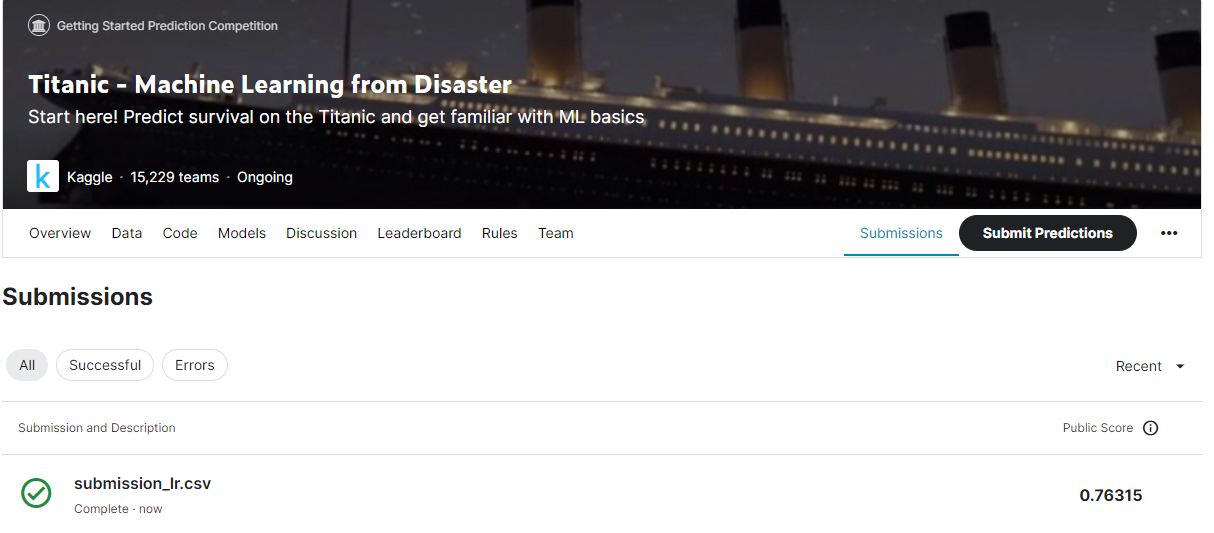

In [ ]:
from IPython.display import Image
Image(filename='/content/kaggle titan.png')


Não é incomum termos desempenho inferior quando submetemos as previsões, pois nosso modelo foi treinado 100% em cima do conjunto de treino: isso significa que ele tem um fit bem melhor ao dataset train.

Vamos ver como se sai um modelo baseado em Árvores de Decisão, seguindo os mesmo passos.

In [ ]:
# criar um modelo de árvore de decisão
tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(train, target)

# verificar a acurácia do modelo
acc_tree = round(tree_model.score(train, target) * 100, 2)
print("Acurácia do modelo de Árvore de Decisão: {}".format(acc_tree))

Acurácia do modelo de Árvore de Decisão: 82.72


Um pequeno ganho na acurácia, chegando agora a quase 83%. Novamente vou gerar um arquivo e submeter o resultado ao Kaggle.

In [ ]:
y_pred_tree = tree_model.predict(test)

submission = pd.DataFrame({
    "PassengerId": passengerId,
    "Survived": y_pred_tree
})

# gerar arquivo csv
submission.to_csv('./submission_tree.csv', index=False)

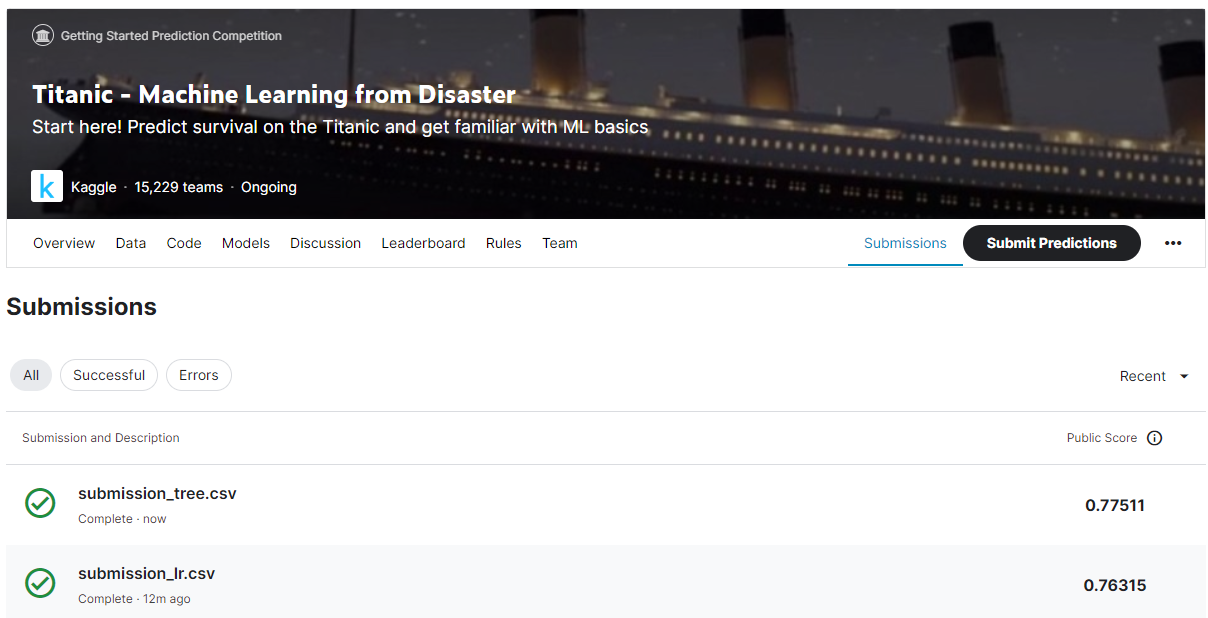

In [ ]:
from IPython.display import Image
Image(filename='/content/kaggle titan tree.png')

Como você vê na figura abaixo, nosso modelo conseguiu atingir um score de 77%.



Eu sobreviveria ao Titanic?
Por fim, já que nosso modelo está pronto, vamos ver se eu e meu marido sobreviveríamos ao naufrágio do Titanic.

Vou considerar que viajaríamos na 2ª Classe, eu com 40 anos e ele com 44, tendo pago o preço médio do Ticket e embarcados no porto de Southampton (Reino Unido).

In [ ]:
# declarar os valores das variáveis para mim e minha esposa

Rodrigo = np.array([2, 0, 44, 1, 1, 32.2, 0, 0, 0, 1]).reshape((1, -1))
Rose = np.array([2, 1, 40, 1, 1, 32.2, 0, 0, 0, 1]).reshape((1, -1))


In [ ]:
# verificar se nós teríamos sobrevivido
print("Rodrigo:\t{}".format(tree_model.predict(Rodrigo)[0]))
print("Rose:\t{}".format(tree_model.predict(Rose)[0]))



Rodrigo:	0
Rose:	1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Infelizmente, de acordo com meu próprio modelo, meu marido não teria sobrevivido ao desastre do Titanic. Já eu fui classificada como sobrevivente.

In [ ]:
#E Se levassemos nossos filhos, dois passageiros masculinos, um com 15 anos e outro com 17 anos

# Crie um array com as características dos passageiros
Passageiro1 = np.array([3, 0, 15, 0, 0, 8.05, 0, 0, 0, 1]).reshape((1, -1))  # Passageiro masculino de 15 anos
Passageiro2 = np.array([3, 0, 17, 0, 0, 8.05, 0, 0, 0, 1]).reshape((1, -1))  # Passageiro masculino de 17 anos

# Verifique a sobrevivência dos passageiros
Sobrevivencia_Passageiro1 = tree_model.predict(Passageiro1)[0]
Sobrevivencia_Passageiro2 = tree_model.predict(Passageiro2)[0]

# Exiba os resultados
print("Passageiro 1 (15 anos) sobreviveria? Resposta: {}".format("Sim" if Sobrevivencia_Passageiro1 == 1 else "Não"))
print("Passageiro 2 (17 anos) sobreviveria? Resposta: {}".format("Sim" if Sobrevivencia_Passageiro2 == 1 else "Não"))



Passageiro 1 (15 anos) sobreviveria? Resposta: Não
Passageiro 2 (17 anos) sobreviveria? Resposta: Não


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Infelizmente, de acordo com meu próprio modelo, meus filhos não teriam sobrevivido ao desastre do Titanic.

**Parece que a realidade retratada no filme de James Cameron traz algumas verdades. Coincidentemente as *Roses* sobrevivem ... 😀**

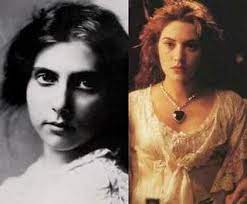

In [ ]:
from IPython.display import Image
Image(filename='//content/download.jpeg')